In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pylab as pl
import importlib
from IPython import display
#from lib import util
from copy import deepcopy
%matplotlib inline
#from lib import frame_util as futil
#importlib.reload(futil)

In [ ]:
vidDict = futil.LoadDictFromTxt("res/101_trajectories/aug_trajectories-0750am-0805am.txt", 'vid')

In [4]:
start = time.time()
frameDict = futil.LoadDictFromTxt("res/101_trajectories/aug_trajectories-0750am-0805am.txt", 'frame')
end = time.time()
print("Loading took ", end - start , " seconds.")

Loading took  22.243069887161255  seconds.


In [4]:
grids = futil.GetGridsFromFrameDict(frameDict)

In [ ]:
print(len(grids))
futil.AnimateFrames(frameDict)

In [ ]:
#[VID, FID, totalF, globaltime, localX, localY, globalX, globalY, \
#vehicleLength, vehicleWidth, vehicleClass, vVelocity, vAccel, laneID\
#precedingVID, followingVID, spacingFt, headwayFt]

In [ ]:
#With a loaded frameDict, animates frames.
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 14
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size
plt.figure(1)

for i in range(int(len(frameDict)/2)):
    curFrame = frameDict[100 + i*5]
    plotFrame(curFrame)
    plt.clf()


    

In [ ]:
def plotFrame(curFrame):
    x,y = getFramePoints(curFrame)    
    plt.plot(y,70 - x, 'ro')
    plt.title("t = " + str(i))
    plt.axis([0, 2250, 0, 70])
    display.clear_output(wait=True)
    display.display(pl.gcf())
    #plt.show()


In [ ]:
def getFramePoints(curFrame):
    x = np.array([0]*len(curFrame))
    y = np.array([0]*len(curFrame))
    entryCounter = 0
    for entry in curFrame:
        x[entryCounter] = float(curFrame[entry][4])
        y[entryCounter] = float(curFrame[entry][5])
        entryCounter += 1
    return x,y

In [ ]:
from lib import vehicleclass as v
import importlib
importlib.reload(v)

In [ ]:
MAX_X = 70
MAX_Y = 2250
X_DIV = 35
Y_DIV = 200
X_STEP = float(MAX_X/X_DIV)
Y_STEP = float(MAX_Y/Y_DIV)
def FrameToGrid(frame):
    #features = x, y, vx, vy, ax, ay
    grid = np.zeros((X_DIV + 2, Y_DIV + 2, 6))
    for vid in frame:
        vehicleData = frame[vid]
        veh = v.vehicle(vehicleData)
        gridX = int(veh.getX() / X_STEP)
        gridY = int(veh.getY() / Y_STEP)
        #print(veh.getX(), gridX, veh.getY(), gridY)
        grid[gridX][gridY] = veh.getTrajectory()
        #print(gridX, gridY)
    return grid

In [ ]:
from lib import vehicleclass as v

importlib.reload(v)
g = FrameToGrid(frameDict[150])

print(g.shape)
print(g)


In [ ]:
def GetGridsFromFrameDict(frameDict):
    gridDict = {}
    for i in frameDict:
        frame = frameDict[i]
        grid = FrameToGrid(frame)
        gridDict[i] = deepcopy(grid)
    return gridDict

In [ ]:
print(frameDict[13])

In [ ]:
gd = GetGridsFromFrameDict(frameDict)

In [ ]:
print(len(gd))

In [ ]:
#print(gd[150])
print(np.sum(gd[150]))
print(gd[150].shape)

In [ ]:
plotFrame(frameDict[150])

In [ ]:
gflat = np.sum(gd[150], axis=2)

In [ ]:
print(gflat.shape)

In [ ]:
gflat[gflat != 0]

In [ ]:
gflat = np.sum(grid, axis=2)
nz = np.nonzero(gflat)
nzx = nz[0]*X_STEP
nzy = nz[1]*Y_STEP
plt.axis([0, 2250, -70, 0])
plt.plot(nzy, -nzx, 'ro')
plt.show()


In [ ]:
plotFrame(frameDict[150])

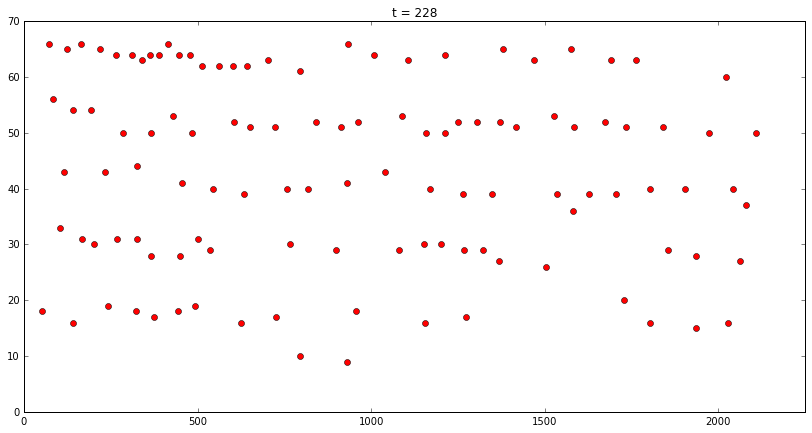

KeyboardInterrupt: 

In [ ]:
from lib import frame_util as futil
importlib.reload(futil)
futil.AnimateFrames(frameDict)

In [25]:
def visualizePredictions(predFilename, actualFilename):
    predFile = open(predFilename)
    predLines = predFile.readlines()
    predArray = np.array(predLines).astype(float)
    predFile.close()
    actualFile = open(actualFilename)
    actualLines = actualFile.readlines()
    actualArray = np.array(actualLines).astype(float)
    actualFile.close()
    x_axis = np.array(range(len(predArray)))
    return x_axis, predArray, actualArray
    
    

In [26]:
actualFilename = "res/101_trajectories/trajectories-0750am-0805am-ytest.txt"
predFilename = "res/101_trajectories/trajectories-0750am-0805am-PREDICTIONS-Linmodel.txt"
x, pred, actual = visualizePredictions(predFilename, actualFilename)

In [27]:
print(x, pred, actual)

[   0    1    2 ..., 8633 8634 8635] [ 64.08780853  64.72117394  61.13068741 ...,  49.52816503  49.95401619
  49.56981191] [ 68.463  68.218  67.936 ...,  40.162  40.353  40.782]


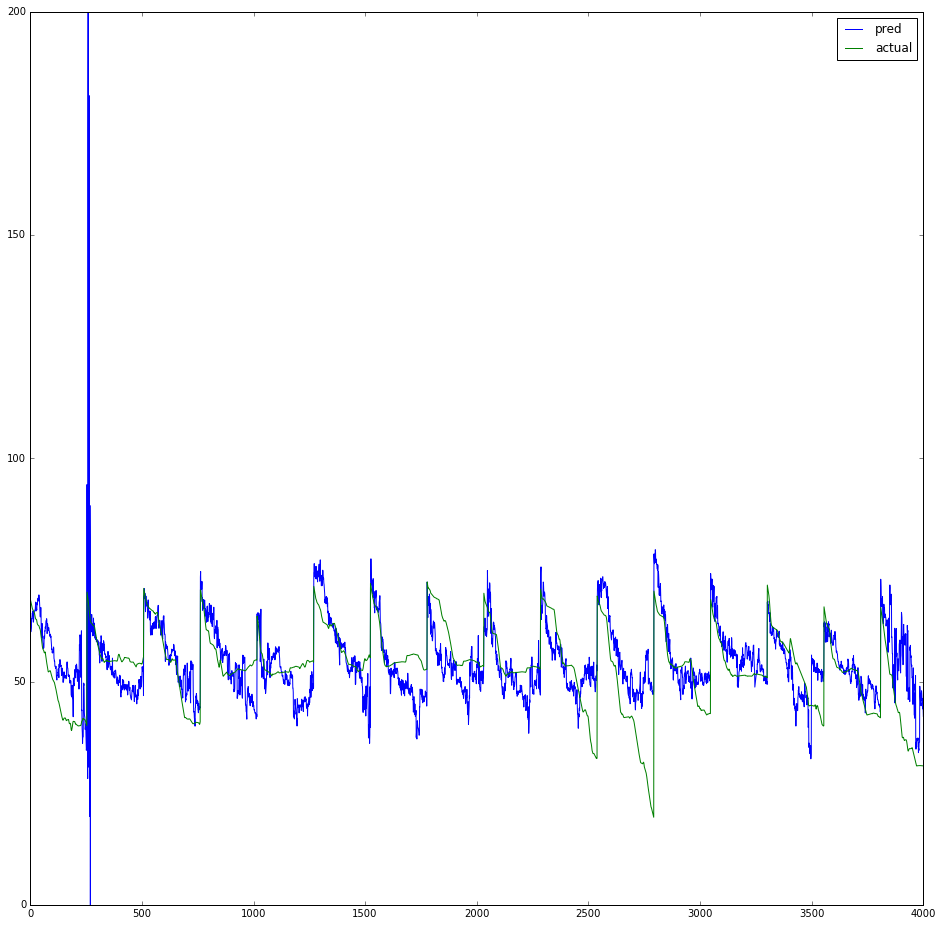

In [40]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 16
plt.rcParams["figure.figsize"] = fig_size
plt.plot(x, pred, label='pred')
plt.plot(x, actual, label='actual')
plt.legend()
plt.axis([0, 4000, 0, 200])
plt.show()